In [195]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Reading the Training Set
Reading the training set from files or from static arrays.

In [196]:
def read_training_set():
    data = pd.read_csv("training_data.csv")
    x = data['x'].values
    y = data['y'].values
    return x, y

### Model Function
Calcualtes the output from the current model with the parameters w and b that are passed as parameters.

In [197]:
def calculate_model(x :float, w, b) -> float:
    return w * x + b

### Cost Function

In [198]:
def calculate_cost(w, b, x :np.array, y : np.array):
    cost = 0
    m = x.shape[0]


    for i in range(len(x)):
        cost += (calculate_model(x[i], w, b) - y[i])**2

    cost = cost / (2*m)

    return cost

### Compute Gradient
Computes the gradient dj_dw and dj_db

In [199]:
def compute_gradient(x :np.array, y :np.array, w, b):
    m = x.shape[0]
    dj_dw = 0
    dj_db = 0

    for i in range(len(x)):
        dj_dw += (calculate_model(x[i], w, b) - y[i]) * x[i]
        dj_db += (calculate_model(x[i], w, b) - y[i])

    dj_dw = dj_dw / m
    dj_db = dj_db / m
    return dj_dw, dj_db

### Gradient Descent

In [200]:
def gradient_descent(x: np.array, y: np.array, w, b, num_iterations, alpha, cost_function, gradient_function):
    cost_history = []
    for i in range(num_iterations):
        dj_dw, dj_db = gradient_function(x, y, w, b)
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        cost = cost_function(w, b, x, y)
        cost_history.append(cost)
        if i % 1 == 10000:
            print(f"Iteration {i}, Cost: {cost}")
    return w, b, cost_history


### Training the model

w:-500.25190358562406 | b:-66.73281721290299 | Final Cost:11.404269958375139


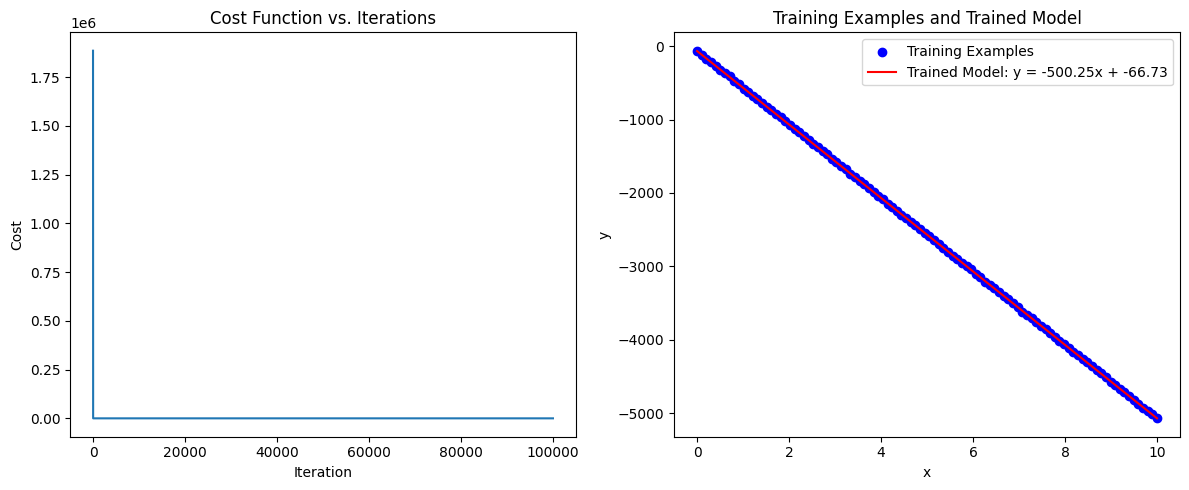

In [201]:
x, y = read_training_set()
num_iterations = 100000
alpha = 0.01
def_w = 0
def_b = 0
w, b, cost_history = gradient_descent(x, y, def_w, def_b, num_iterations, alpha, calculate_cost, compute_gradient)
print(f"w:{w} | b:{b} | Final Cost:{calculate_cost(w,b,x,y)}")


# Plot cost graph
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(cost_history)
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.title("Cost Function vs. Iterations")

# Plot training examples and final model
plt.subplot(1, 2, 2)
plt.scatter(x, y, color='blue', label='Training Examples')
model_y = calculate_model(x, w, b)
plt.plot(x, model_y, color='red', label=f'Trained Model: y = {w:.2f}x + {b:.2f}')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Training Examples and Trained Model")
plt.legend()

plt.tight_layout()
plt.show()